In [55]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Activities.csv")
data.head(5)

,Activity Type,Date,Favorite,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,...,Avg Power,Max Power,Steps,Decompression,Best Lap Time,Number of Laps,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Running,2025-09-28 23:07:55,False,Fullerton Running,8.56,"1,035",01:14:14,141,150,3.1,...,358,577,"11,904",No,00:04:45.9,9,01:14:10,01:16:04,207,249
1,Running,2025-09-27 10:21:20,False,Fullerton Running,16.01,"1,944",02:10:28,153,177,4.1,...,382,494,"21,386",No,00:00:03.1,17,02:10:19,02:13:38,209,287
2,Treadmill Running,2025-09-26 09:25:42,False,Treadmill Running,5.00,539,00:52:20,129,140,2.0,...,285,347,"8,338",No,00:08:58.6,5,00:52:04,00:54:37,--,--
3,Running,2025-09-25 11:48:47,False,Fullerton Running,8.01,887,01:01:50,144,178,3.2,...,403,487,"10,314",No,00:00:02.5,9,01:01:42,01:03:08,207,245
4,Treadmill Running,2025-09-24 12:54:49,False,Treadmill Running,7.00,727,01:14:28,127,151,2.1,...,257,318,"11,922",No,00:02:58.8,7,01:13:43,01:16:52,--,--


In [56]:
#Adding Weekday and Week Columns
# date conversion
data["Date"] = pd.to_datetime(data["Date"])

#Adding a week day column
data["Weekday"] = data["Date"].dt.day_name()
 #Getting Weeks
data["Week_Start"] = data["Date"].dt.to_period("W-SUN").apply(lambda r: r.start_time)
data["Week"] = data["Week_Start"].rank(method="dense").astype(int)

In [57]:
#Cleaning Data

data = data[["Date", "Week", "Weekday", "Distance", "Calories", "Time", "Avg HR", "Max HR", "Avg Pace", "Best Pace", "Total Ascent", "Total Descent", "Steps"]]

In [58]:
# Changing strings into numbers we can work with

data = data.copy()


# String COnversion
cols = ["Distance", "Calories", "Steps", "Total Ascent", "Total Descent"]

for col in cols:
    data[col] = (
        data[col].astype(str).str.replace(",", "").str.replace("--", "0").astype(float)
    )


In [59]:
#Chaning Time
data["Time"] = pd.to_timedelta(data["Time"]).dt.total_seconds() / 60
data["Time"].mean()

np.float64(75.53999999999999)

In [60]:
#Changing Paces
def pace_converter_func(pace):
    m, s = pace.split(":")
    m = float(m)
    s = float(s)
    s = s*(5/3)
    s = s/100
    final_pace = m+s
    return final_pace

data["Avg Pace"] = data["Avg Pace"].apply(pace_converter_func)
data['Best Pace'] = data["Best Pace"].apply(pace_converter_func)
data.dtypes

Date             datetime64[ns]
Week                      int64
Weekday                  object
Distance                float64
Calories                float64
Time                    float64
Avg HR                    int64
Max HR                    int64
Avg Pace                float64
Best Pace               float64
Total Ascent            float64
Total Descent           float64
Steps                   float64
dtype: object

In [61]:
data

,Date,Week,Weekday,Distance,Calories,Time,Avg HR,Max HR,Avg Pace,Best Pace,Total Ascent,Total Descent,Steps
0,2025-09-28 23:07:55,4,Sunday,8.56,1035.0,74.233333,141,150,8.666667,5.750000,26.0,46.0,11904.0
1,2025-09-27 10:21:20,4,Saturday,16.01,1944.0,130.466667,153,177,8.150000,6.600000,230.0,203.0,21386.0
2,2025-09-26 09:25:42,4,Friday,5.00,539.0,52.333333,129,140,10.466667,9.033333,0.0,0.0,8338.0
3,2025-09-25 11:48:47,4,Thursday,8.01,887.0,61.833333,144,178,7.716667,6.800000,98.0,79.0,10314.0
4,2025-09-24 12:54:49,4,Wednesday,7.00,727.0,74.466667,127,151,10.633333,9.950000,0.0,0.0,11922.0
5,2025-09-23 19:53:50,4,Tuesday,8.56,1033.0,64.200000,161,183,7.500000,5.350000,39.0,66.0,10686.0
6,2025-09-22 21:19:42,4,Monday,7.02,862.0,57.716667,150,165,8.233333,5.783333,92.0,105.0,9438.0
7,2025-09-20 19:18:33,3,Saturday,20.03,2482.0,175.450000,152,174,8.766667,6.466667,266.0,285.0,28328.0
8,2025-09-19 18:36:07,3,Friday,4.00,430.0,49.933333,120,129,12.483333,9.983333,0.0,0.0,7676.0
9,2025-09-18 21:36:23,3,Thursday,5.06,631.0,44.366667,145,160,8.766667,6.816667,56.0,69.0,7172.0


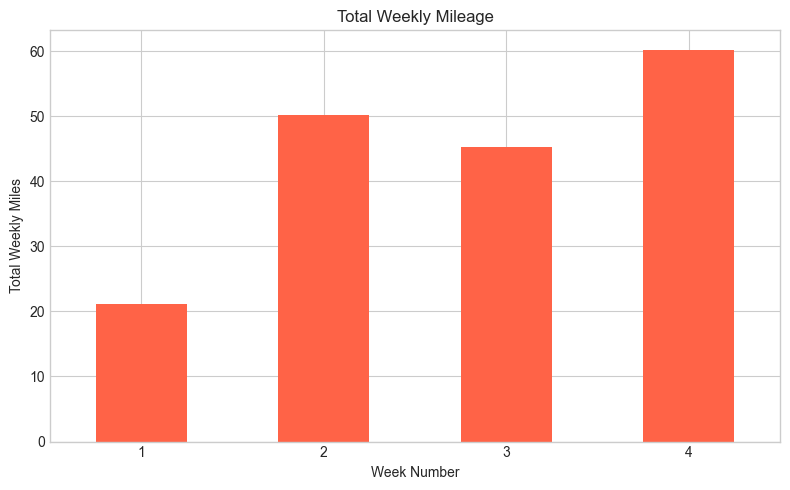

In [73]:
#Starting with visuals
plt.style.use("seaborn-v0_8-whitegrid")

#Miles by Week

weekly_miles = data.groupby("Week")["Distance"].sum()

plt.figure(figsize=(8,5))

weekly_miles.plot(kind="bar", color="tomato")
plt.title("Total Weekly Mileage")
plt.xlabel("Week Number")
plt.ylabel("Total Weekly Miles")
plt.xticks(rotation=0)
plt.tight_layout()


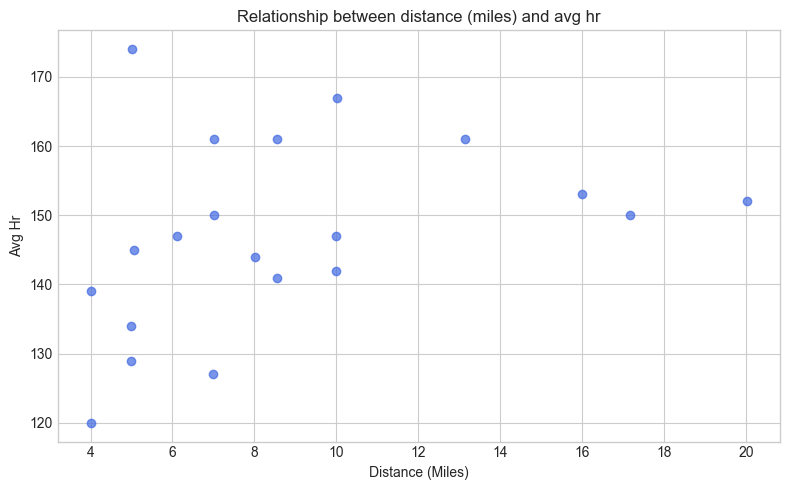

In [77]:
#ScatterPlot of avg hr and distance

plt.figure(figsize=(8,5))
plt.scatter(data["Distance"], data["Avg HR"], alpha=0.7, color="royalblue")
plt.title("Relationship between distance (miles) and avg hr")
plt.xlabel("Distance (Miles)")
plt.ylabel("Avg Hr")
plt.tight_layout()